In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

Plot the correlation matrix for LSSTY1 + DESI

In [2]:
# Get the rp bins:
#rp_bin_c = np.loadtxt('../txtfiles/rp_bins_mid_plot_fixShapeNoise.txt')

In [3]:
#print(rp_bin_c)

In [4]:
corr_Y1 = np.loadtxt('../txtfiles/joint_correlation_rp0=1.5_Jul2025_LSSTY10.dat')

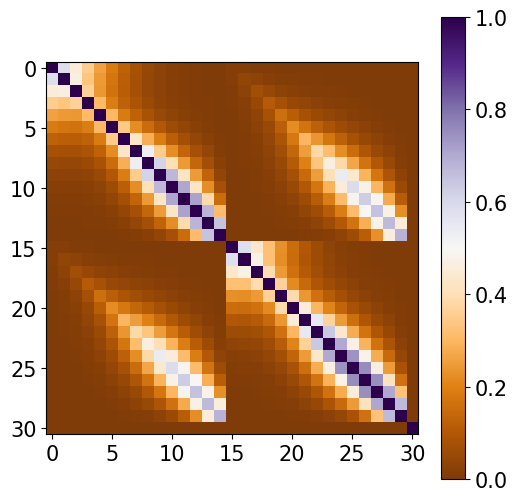

In [3]:
cmap=plt.get_cmap('PuOr')
plt.figure(figsize=[6,6])
plt.imshow(corr_Y1, cmap=cmap)
plt.yticks(fontsize=15)
plt.xticks(fontsize=15)
cbar2 = plt.colorbar()
cbar2.ax.tick_params(labelsize=15)
#plt.savefig('../plots/sims_corr_myunits_wSN_rp0=1.5_Y10.pdf')
plt.show()

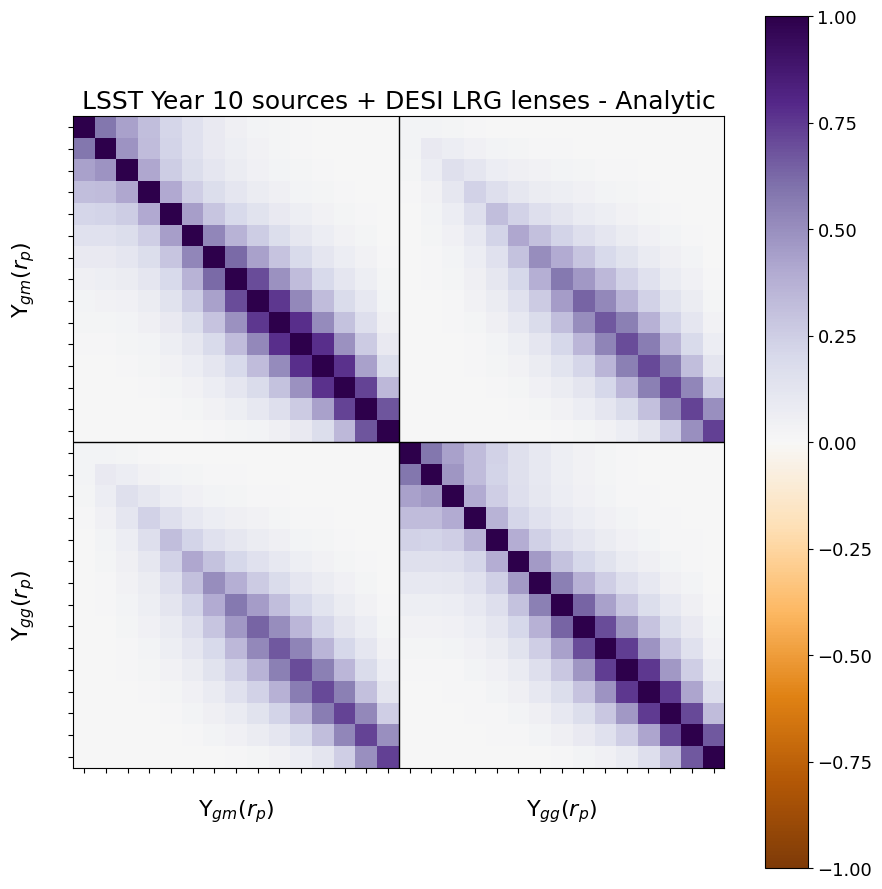

In [6]:
cmap = plt.get_cmap('PuOr')

# Remove final element (β) from correlation matrix
corr_Y1_trimmed = corr_Y1[:-1, :-1]  # Shape: 32x32

# Updated quantity structure
bin_counts = [15, 15]  # Only gm and gg
labels_latex = [r'$\Upsilon_{gm}(r_p)$', r'$\Upsilon_{gg}(r_p)$']
group_positions = np.cumsum([0] + bin_counts)  # [0, 15, 30]

# Tick positions only (no labels)
tick_positions = np.arange(sum(bin_counts))  # 0 to 29

# Plot
fig, ax = plt.subplots(figsize=(9, 9))
im = ax.imshow(corr_Y1_trimmed, cmap=cmap, vmin=-1, vmax=1)

# Set ticks without labels
ax.set_xticks(tick_positions)
ax.set_yticks(tick_positions)
ax.set_xticklabels([''] * len(tick_positions), rotation=90, fontsize=11)
ax.set_yticklabels([''] * len(tick_positions), fontsize=11)

# Colorbar
cbar = plt.colorbar(im, ax=ax)
cbar.ax.tick_params(labelsize=13)

# Draw divider lines between groups
for i in range(1, len(group_positions) - 1):
    ax.axhline(group_positions[i] - 0.5, color='black', linewidth=1)
    ax.axvline(group_positions[i] - 0.5, color='black', linewidth=1)

# Add group labels on bottom and left, with larger font
for i, label in enumerate(labels_latex):
    start = group_positions[i]
    end = group_positions[i + 1]
    center = (start + end - 1) / 2
    ax.text(center, len(tick_positions) + 1.5, label,
            ha='center', va='center', fontsize=16, fontweight='bold')
    ax.text(-2.8, center, label,
            ha='center', va='center', fontsize=16, fontweight='bold', rotation=90)

# Title and layout
plt.title('LSST Year 10 sources + DESI LRG lenses - Analytic', fontsize=18)
plt.tight_layout()
plt.savefig('../plots/LSSTY10_DESI_corrmat_analytic_trimmed.pdf')
plt.show()

In [20]:
cov_Y10_sim = np.loadtxt('../txtfiles/sims_cov_myunits_Jun25_LSSTY10_addSNmat.dat')
#cov_Y10_sim = np.loadtxt('../txtfiles/sims_cov_myunits_wSN_Jun25_LSSTY1.dat')
#cov_Y10 = np.loadtxt('../txtfiles/sims_cov_myunits_wSN_Jun25_LSSTY10.dat')

#cov_Y1_ana = np.loadtxt('../txtfiles/joint_covariance_rp0=1.5_Jul2025.dat')
cov_Y10_ana = np.loadtxt('../txtfiles/joint_covariance_rp0=1.5_Jul2025_LSSTY10.dat')

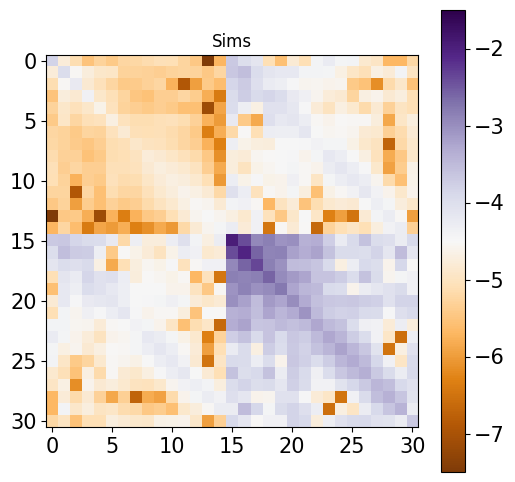

/tmp/ipykernel_11018/4063680101.py:14: RuntimeWarning: divide by zero encountered in log10
  plt.imshow(np.log10(np.abs((cov_Y10_ana))), cmap=cmap, vmin = -7.5, vmax=-1.5)


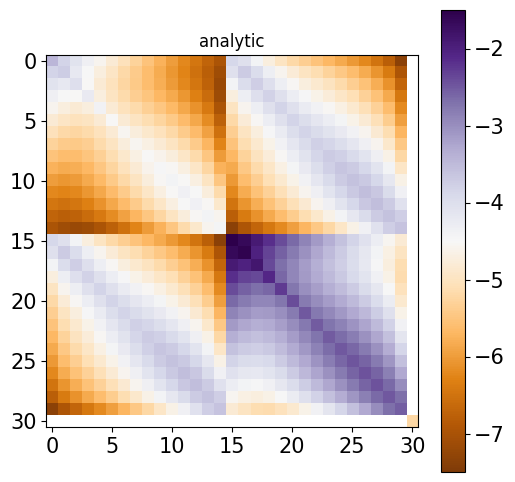

In [21]:
cmap=plt.get_cmap('PuOr')
plt.figure(figsize=[6,6])
plt.imshow(np.log10(np.abs((cov_Y10_sim))), cmap=cmap, vmin = -7.5, vmax=-1.5)
plt.yticks(fontsize=15)
plt.xticks(fontsize=15)
cbar2 = plt.colorbar()
cbar2.ax.tick_params(labelsize=15)
plt.title('Sims')
plt.savefig('../plots/sims_cov_myunits_wSN_rp0=1.5_Y10.pdf')
plt.show()

cmap=plt.get_cmap('PuOr')
plt.figure(figsize=[6,6])
plt.imshow(np.log10(np.abs((cov_Y10_ana))), cmap=cmap, vmin = -7.5, vmax=-1.5)
plt.yticks(fontsize=15)
plt.xticks(fontsize=15)
cbar2 = plt.colorbar()
cbar2.ax.tick_params(labelsize=15)
plt.title('analytic')
plt.savefig('../plots/analytic_cov_rp0=1.5_Y10.pdf')
plt.show()